As in previous lessons, please submit a link to a single gist that contains links to two Juypyter notebooks (one for each assignment below).

# 1. Weather model

For this assignment, you'll revisit the historical temperature dataset. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [74]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Like in the previous lesson, build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?


In [75]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [76]:
weather_df['target'] = weather_df['Apparent Temperature (C)'] - weather_df['Temperature (C)']

In [77]:
X = weather_df[['Humidity', 'Wind Speed (km/h)']]
Y = weather_df['target']
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        19:23:43   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4381      0.021    115.948      0.000       2.397       2.479
Humidity             -3.0292      0.024   -126.479      0.000      -3.076      -2.982
Wind Speed (km/h)    -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared ve Adj. R-squared değeri 0.288. Özeliklerimiz hedef değişkendeki varyansın %28'ini açıklıyor. Bu da oldukça düşük bir oran.

- Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?

In [78]:
weather_df['humidity_windspeed'] = weather_df['Humidity'] * weather_df['Wind Speed (km/h)']

In [79]:
X = weather_df[['Humidity', 'Wind Speed (km/h)','humidity_windspeed' ]]
Y = weather_df['target']
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        19:23:45   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0839      0.033      2.511      0.012       0.018       0.149
Humidity               0.1775      0.043      4.133      0.000       0.093       0.262
Wind Speed (km/h)      0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared ve Adj. R-squared değeri arttı ama modelimiz hedef değişkenin açıklanmasında hala çok zayıf bir model.

- Add visibility as additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?

In [80]:
X = weather_df[['Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]
Y = weather_df['target']
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        19:23:46   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5756      0.028     56.605      0.000       1.521       1.630
Humidity             -2.6066      0.025   -102.784      0.000      -2.656      -2.557
Wind Speed (km/h)    -0.1199      0.001   -179.014      0.000      -0.121      -0.119
Visibility (km)       0.0540      0.001     46.614      0.000       0.052       0.056
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝐻𝑢𝑚𝑖𝑑𝑖𝑡𝑦 ve 𝑊𝑖𝑛𝑑𝑆𝑝𝑒𝑒𝑑(𝑘𝑚/ℎ) ile oluşturduğumuz birinci modelde R-squared değeri 0.288'di. 𝑉𝑖𝑠𝑖𝑏𝑖𝑙𝑖𝑡𝑦(𝑘𝑚) özelliğini eklediğimiz üçüncü modelimizde R-squared değeri 0.304'e yükseldi. Model hala bizim için hedef değişkeni iyi açıklayan bir model değil.

- AIC ve BIC puanlarına göre yukarıdaki üç modelden en iyisini seçin. Gerekçenizi mentorunuzla tartışarak seçiminizi doğrulayın.

AIC ve BIC değerlerinin düşük olduğu modeller daha iyi modellerdir diyebiliriz. 

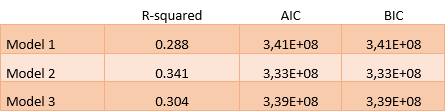

R-squared değeri en yüksek , AIC ve BIC değeri en düşük model ikinci model olduğu için ikinci model en iyi modeldir diyebiliriz.

# 2. House prices model

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

In [81]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.

In [82]:
house_price = pd.DataFrame()
house_price = house_prices_df[['MSSubClass', 'MSZoning','LotArea','Street','LotShape','Neighborhood','BldgType','GrLivArea',
                               'OverallQual','YearBuilt','RoofStyle', 'HouseStyle' ,'TotalBsmtSF', 'Heating','TotRmsAbvGrd',
                               'Fireplaces','GarageCars','PoolArea', 'YrSold', 'SaleType','SaleCondition','FullBath',
                               'SalePrice']]

In [83]:
for col in house_price.select_dtypes(include='object'):
    df = pd.DataFrame(house_price[col].unique())
    df.columns = [col]
    for i in house_price[col].unique():
        house_price.loc[house_price[col] == i , col+'_num'] = df[df[col] == i ].index[0]

In [84]:
Y = house_price['SalePrice']
X = house_price[['GrLivArea','YearBuilt', 'TotalBsmtSF', 'GarageCars','Fireplaces']]
X = sm.add_constant(X)
results = sm.OLS(Y , X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     774.2
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        19:23:51   Log-Likelihood:                -17596.
No. Observations:                1460   AIC:                         3.520e+04
Df Residuals:                    1454   BIC:                         3.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.24e+06   8.54e+04    -14.523      0.000   -1.41e+06   -1.07e+06
GrLivArea      64.9604      2.639     24.611      0.000      59.783      70.138
YearBuilt     628.8382     44.199     14.227      0.000     542.137     715.539
TotalBsmtSF    37.3222      3.025     12.340      0.000      31.389      43.255
GarageCars   2.015e+04   1941.364     10.378      0.000    1.63e+04     2.4e+04
Fireplaces   1.309e+04   1934.671      6.768      0.000    9298.591    1.69e+04
==============================================================================
Omnibus:                      479.462   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46085.670
Skew:                          -0.517   Prob(JB):                         0.00
Kurtosis:                      30.505   Cond. No.                     2.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Bu modelde R-squared ve Adj. R-squared değerlerine bakarak elimizde iyi bir model var diyebiliriz. AIC ve BIC değerleri birbirine çok yakın. Ama karşılaştırabileceğimiz başka bir model olmadığı için F-statistic , AIC ve BIC değerleri için iyi veya kötüdür gibi yorumlar yapamayız.

- Do you think your model is satisfactory? If so, why?

R-squared değerine baktığımızda özelliklerimizin hedef değişkenin %72'ini açıkladığını görüyoruz. Bu bakıldığı zaman iyi bir orandır ama bu değeri arttırmaya çalışarak daha iyi tahminler yapan bir model elde edilebilir. Belli bir eşik değeri yoktur ama R-squared değerinin 1'e çok yakın olmasını da istemeyiz. Bu durum overfitting'e yol açabilir.

- In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.

In [85]:
Y = house_price['SalePrice']
X = house_price[['GrLivArea','YearBuilt', 'TotalBsmtSF', 'GarageCars','Fireplaces','LotArea','BldgType_num','OverallQual']]
X = sm.add_constant(X)
results = sm.OLS(Y , X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     651.8
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        19:23:56   Log-Likelihood:                -17431.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1451   BIC:                         3.493e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.348e+05   8.45e+04     -9.881      0.000      -1e+06   -6.69e+05
GrLivArea       44.8551      2.591     17.309      0.000      39.772      49.938
YearBuilt      389.2071     44.465      8.753      0.000     301.984     476.430
TotalBsmtSF     24.2105      2.809      8.619      0.000      18.701      29.720
GarageCars    1.278e+04   1776.986      7.194      0.000    9298.340    1.63e+04
Fireplaces    7261.9274   1769.278      4.104      0.000    3791.311    1.07e+04
LotArea          0.4729      0.106      4.444      0.000       0.264       0.682
BldgType_num -5935.0318    966.095     -6.143      0.000   -7830.123   -4039.940
OverallQual   2.059e+04   1140.191     18.055      0.000    1.83e+04    2.28e+04
==============================================================================
Omnibus:                      442.155   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55441.691
Skew:                          -0.174   Prob(JB):                         0.00
Kurtosis:                      33.187   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'Neighborhood', 'BldgType', 'GrLivArea', 'OverallQual', 'YearBuilt',
       'RoofStyle', 'HouseStyle', 'TotalBsmtSF', 'Heating', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold', 'SaleType',
       'SaleCondition', 'FullBath', 'SalePrice', 'MSZoning_num', 'Street_num',
       'LotShape_num', 'Neighborhood_num', 'BldgType_num', 'RoofStyle_num',
       'HouseStyle_num', 'Heating_num', 'SaleType_num', 'SaleCondition_num'],
      dtype='object')

Modelin performans metriği olan R-squared değeri %72'den %78'e yükseldi. 𝑂𝑣𝑒𝑟𝑎𝑙𝑙𝑄𝑢𝑎𝑙 özelliği hedef değişkenin açıklanmasında büyük rol oynadı.

- For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

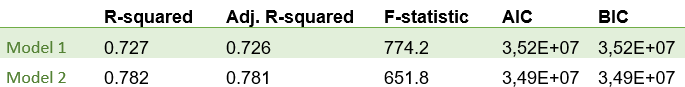

F-statistic değerinin düşük olması dışında model 2 diğer modele göre daha iyi bir modeldir diyebiliriz. R-squared değeri yüksek ve AIC,BIC değerleri düşüktür.